# The question

## Pandas plot doesn't show

When using this in a script (not IPython), nothing happens, i.e. the plot window doesn't appear :

```python
import numpy as np
import pandas as pd
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts.plot()```

Even when adding time.sleep(5), there is still nothing. Why?

Is there a way to do it, without having to manually call matplotlib ?

# The answer


Once you have made your plot, you need to tell matplotlib to show it. The usual way to do things is to import matplotlib.pyplot and call show from there:

```python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts.plot()
plt.show()```

Since you have requested not to do that (why?), you could use the following:

``` python
import numpy as np
import pandas as pd
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts.plot()
pd.tseries.plotting.pylab.show()
```

But all you are doing there is finding somewhere that matplotlib has been imported in pandas, and calling the same show function from there.

Are you trying to avoid calling matplotlib in an effort to speed things up? If so then you are really not speeding anything up, since pandas already imports pyplot:

`python -mtimeit -s 'import pandas as pd'`
100000000 loops, best of 3: 0.0122 usec per loop

`python -mtimeit -s 'import pandas as pd; import matplotlib.pyplot as plt'`
100000000 loops, best of 3: 0.0125 usec per loop
Finally, the reason the example you linked in comments doesn't need the call to matplotlib is because it is being run interactively in an iPython notebook, not in a script.

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [13]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

In [17]:
ts = ts.cumsum()

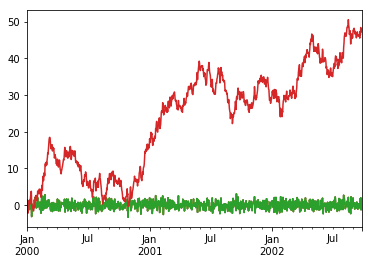

In [18]:
ts.plot()
plt.show()